### Обзор данных

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import date,datetime, timedelta

In [60]:
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
expenses = pd.read_csv ('/datasets/costs_info_short.csv')

In [61]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [62]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [63]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Вывод**: Все названия столбцов необходимо привести к нижнему и змеиному регистру.  
Также необходимо изменить тип данных у столбцов с датой и временем во всех таблицах.

### Предобработка данных

In [64]:
sessions.columns = sessions.columns.str.lower()
orders.columns = orders.columns.str.lower()
expenses.columns = expenses.columns.str.lower() #приводим названия столбцов к нижнему регистру

In [65]:
sessions.info()
print()
orders.info()
print()
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session start  309901 non-null  object
 5   session end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user id   40212 non-null  int64  
 1   event dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

In [66]:
sessions.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'}, inplace = True )
orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'}, inplace = True ) #приводим к змеиному языку

In [67]:
sessions.info()
print()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [68]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'], format='%Y.%m.%d %H:%M:%S')
sessions['session_end'] = pd.to_datetime(sessions['session_end'], format='%Y.%m.%d %H:%M:%S')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y.%m.%d %H:%M:%S')
expenses['dt'] =  pd.to_datetime(expenses['dt']) #изменяем тип данных

In [69]:
sessions.info()
print()
orders.info()
print()
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

In [70]:
sessions.duplicated().sum()

0

In [71]:
orders.duplicated().sum()

0

In [72]:
expenses.duplicated().sum()

0

In [73]:
sessions.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [74]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [75]:
expenses.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

**Вывод**: Были изменены типы данных в столбцах, привидены названия столбцов к нижнему и змеиному регистру. Пропущенных значений и явных дубликатов нет.

### Вывод функций для расчёта и анализа LTV, ROI, удержания и конверсии

In [76]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14

In [77]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем стоимость привлечения для каждой когорты и канала
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [78]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [79]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 
    

In [80]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Вывод**: Основные функции заданы

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Хорошо, все необходимые функции были заданы, можно приступать к расчета и анализу👀

### Исследовательский анализ данных

In [81]:
profiles = get_profiles(sessions, orders, expenses)

In [82]:
min_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

print(min_date)
print()
print(observation_date)

2019-05-01 00:00:00

2019-10-27 00:00:00


Минимальная дата привлечения пользователей: 1 мая 2019 года.  
Максимальная: 27 октября 2019 года.

In [83]:
region_payer_share = pd.pivot_table(
    profiles,
    index='region',
    values='user_id',
    aggfunc='count',
    columns='payer',
    fill_value=0
)
region_payer_share.columns = ['non_payers', 'payers']
region_payer_share['share'] = 100 * (region_payer_share['payers'] / (region_payer_share['non_payers'] + region_payer_share['payers']))
region_payer_share.sort_values(by='share', ascending=False, inplace=True)
region_payer_share['share'] = region_payer_share['share'].map('{:.1f}%'.format)


In [84]:
region_payer_share

,non_payers,payers,share
region,,,
United States,93100,6902,6.9%
Germany,14365,616,4.1%
UK,16875,700,4.0%
France,16787,663,3.8%


В приложение в основном приходят пользователи из США и Европы. Наибольший удельный вес платящих пользователей - из США.

In [85]:
device_payer_share = pd.pivot_table(
    profiles,
    index='device',
    values='user_id',
    aggfunc='count',
    columns='payer',
    fill_value=0
)
device_payer_share.columns = ['non_payers', 'payers']
device_payer_share['share'] = 100 * (device_payer_share['payers'] / (device_payer_share['non_payers'] + device_payer_share['payers']))
device_payer_share.sort_values(by='share', ascending=False, inplace=True)
device_payer_share['share'] = device_payer_share['share'].map('{:.1f}%'.format)


In [86]:
device_payer_share

,non_payers,payers,share
device,,,
Mac,28130,1912,6.4%
iPhone,51097,3382,6.2%
Android,32982,2050,5.9%
PC,28918,1537,5.0%


Платящие пользователи предпочитают Mac, iPhone и Android с PC.

In [87]:
channel_payer_share = pd.pivot_table(
    profiles,
    index='channel',
    values='user_id',
    aggfunc='count',
    columns='payer',
    fill_value=0
)
channel_payer_share.columns = ['non_payers', 'payers']
channel_payer_share['share'] = 100 * (channel_payer_share['payers'] / (channel_payer_share['non_payers'] + channel_payer_share['payers']))
channel_payer_share.sort_values(by='share', ascending=False, inplace=True)
channel_payer_share['share'] = channel_payer_share['share'].map('{:.1f}%'.format)

In [88]:
channel_payer_share

,non_payers,payers,share
channel,,,
FaceBoom,25587,3557,12.2%
AdNonSense,3440,440,11.3%
lambdaMediaAds,1924,225,10.5%
TipTop,17683,1878,9.6%
RocketSuperAds,4096,352,7.9%
WahooNetBanner,8100,453,5.3%
YRabbit,4147,165,3.8%
MediaTornado,4208,156,3.6%
LeapBob,8291,262,3.1%


В топ 3 рекламных каналов по привлечению пользователей входит: FaceBoom, AdNon Sense, lambdaMediaAds

**Вывод**:
- Минимальная дата привлечения пользователей: 1 мая 2019 года.
Максимальная: 10 октября 2019 года.
- В приложение в основном приходят пользователи из США и Европы. Наибольший удельный вес платящих пользователей - из США.
- Платящие пользователи предпочитают Mac, iPhone и Android с PC.
- В топ 3 рекламных каналов по привлечению пользователей входит: FaceBoom, AdNon Sense, lambdaMediaAds.

### Маркетинговый анализ

In [89]:
expenses.head(5)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [90]:
expenses['costs'].sum().round() #общая сумма расходов

105497.0

In [91]:
costs_channel = pd.DataFrame()
costs_channel['costs'] = expenses.groupby('channel')['costs'].sum()
costs_channel.sort_values(by ='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Наибольшая сумма затраченных средств приходится на TipTop и FaceBoom

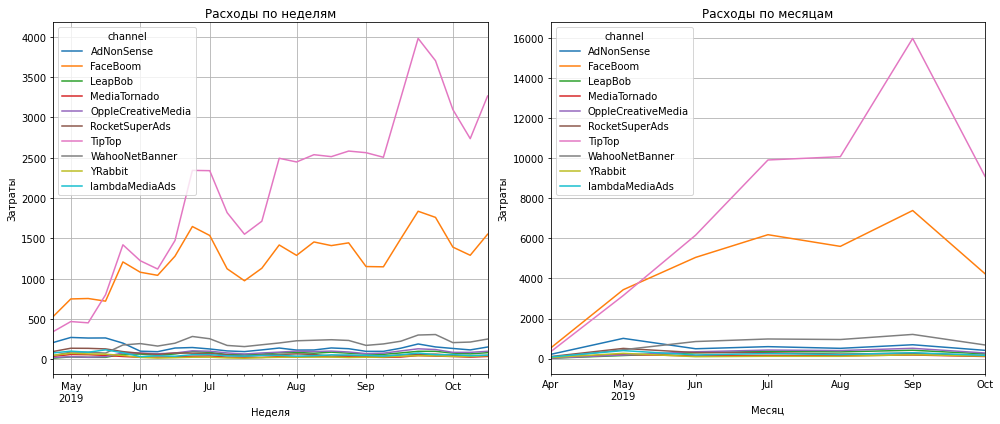

In [92]:
expenses['dt'] = pd.to_datetime(expenses['dt'])
expenses.set_index('dt', inplace=True)

# Приведение даты к недельной дате
expenses['weekly_date'] = expenses.index.to_period('W').start_time

# Группировка данных по неделям и источникам, агрегация суммы расходов
weekly_costs = expenses.groupby(['weekly_date', 'channel'])['costs'].sum().unstack()

# Группировка данных по месяцам и источникам, агрегация суммы расходов
monthly_costs = expenses.groupby([pd.Grouper(freq='M', key='weekly_date'), 'channel'])['costs'].sum().unstack()

# Создание фигуры с подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Визуализация по неделям
weekly_costs.plot(ax=axes[0], grid=True)
axes[0].set_title('Расходы по неделям')
axes[0].set_xlabel('Неделя')
axes[0].set_ylabel('Затраты')

# Визуализация по месяцам
monthly_costs.plot(ax=axes[1], grid=True)
axes[1].set_title('Расходы по месяцам')
axes[1].set_xlabel('Месяц')
axes[1].set_ylabel('Затраты')

# Общие настройки для обоих графиков
plt.tight_layout()
plt.show()

В разбивке по разным временным интервалам рост расходов наблюдается только у двух каналов: TipTop и FaceBoom

In [93]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [94]:
new_users = profiles.groupby(['dt','channel']).agg(new_users_count=('user_id','nunique')).reset_index()
new_users['dt'] = pd.to_datetime(new_users['dt'])
ad_expenses = expenses.merge(new_users, on=['dt','channel'], how='left')
ad_expenses['CAC'] = ad_expenses['costs'] / ad_expenses['new_users_count']
ad_expenses

,dt,channel,costs,weekly_date,new_users_count,CAC
0,2019-05-01,FaceBoom,113.3,2019-04-29,104,1.089423
1,2019-05-02,FaceBoom,78.1,2019-04-29,72,1.084722
2,2019-05-03,FaceBoom,85.8,2019-04-29,76,1.128947
3,2019-05-04,FaceBoom,136.4,2019-04-29,123,1.108943
4,2019-05-05,FaceBoom,122.1,2019-04-29,113,1.080531
...,...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-21,9,0.444444
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-21,10,0.640000
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-21,12,0.733333
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-21,15,0.586667


In [95]:
cac_channel = pd.DataFrame()
ad_expenses = ad_expenses.query('channel != "organic"')
cac_channel['cac_mean'] = ad_expenses.groupby('channel')['CAC'].mean()
cac_channel.sort_values(by='cac_mean', ascending=False)

,cac_mean
channel,
TipTop,2.655599
FaceBoom,1.112864
AdNonSense,1.010467
lambdaMediaAds,0.721029
WahooNetBanner,0.599336
RocketSuperAds,0.406634
OppleCreativeMedia,0.249327
MediaTornado,0.218692
YRabbit,0.211194


In [96]:
ad_expenses['CAC'].mean()

0.7394585758683208

Таким образом, средняя общая стоимость привлечения одного пользователя составляется 0,74. При этом наибольший САС наблюдается у TipTop и FaceBoom.

**Вывод**:
- Общая сумма расходов на маркетинг составляет 105497 руб.
- Наибольшая сумма затраченных средств приходится на TipTop и FaceBoom.
- В разбивке по разным временным интервалам рост расходов наблюдается только у двух каналов: TipTop и FaceBoom.
- Средняя общая стоимость привлечения одного пользователя составляется 0,74. При этом наибольший САС наблюдается у TipTop и FaceBoom.

### Оценка окупаемости рекламы

In [97]:
profiles = profiles.query('channel != "organic"')

In [98]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [99]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

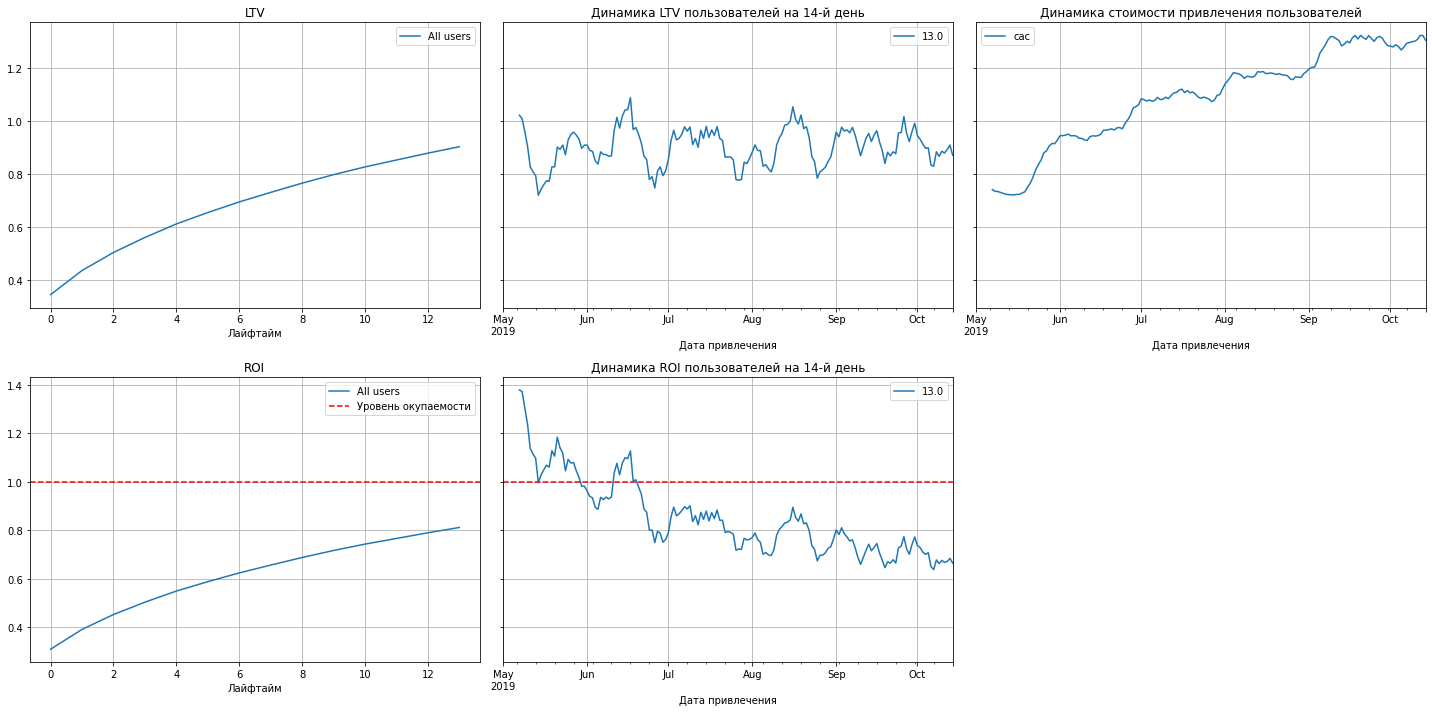

In [100]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- В рамках рассматриваемого периода LTV выглядит стабильным;
- САС имеет тенденцию к росту;
- ROI не достиг уровня окупаемости;
- Пользователи перестают окупаться со второй половины июня.

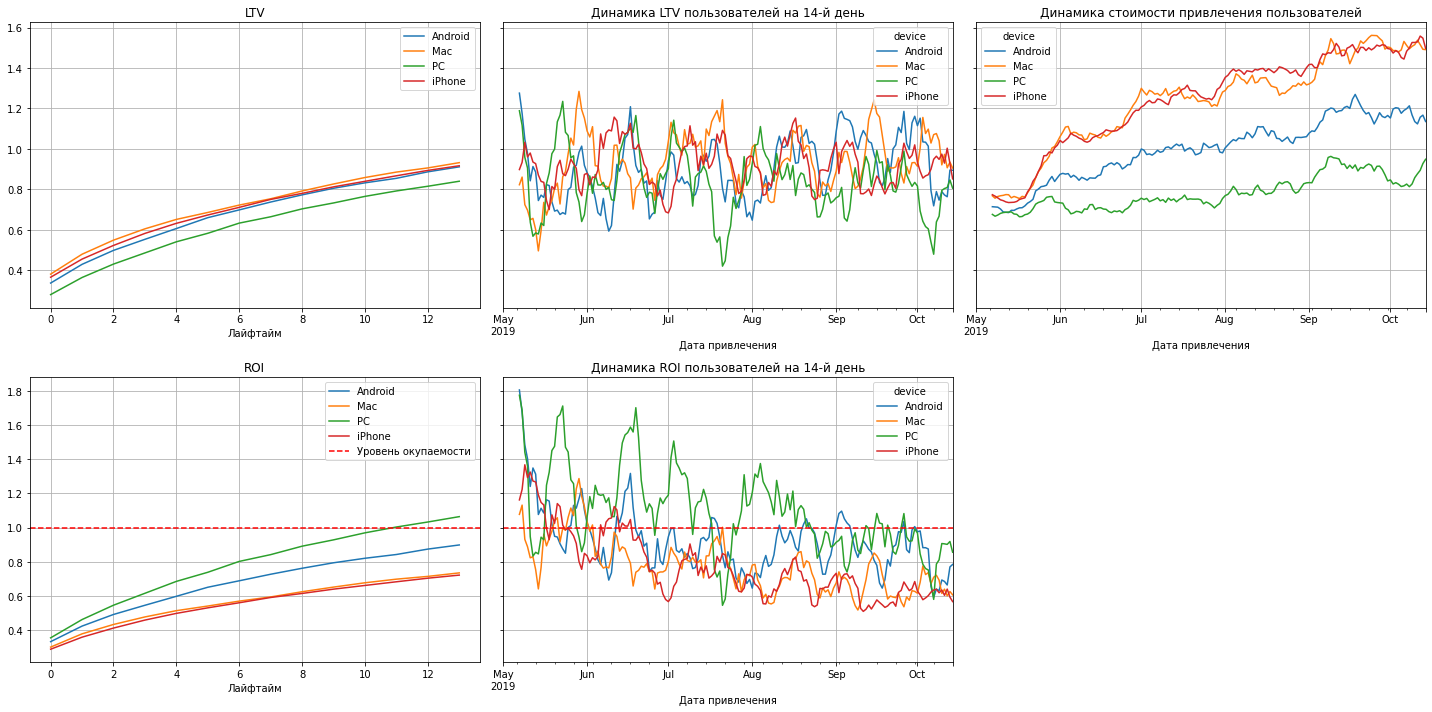

In [101]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

С разбивкой по устройствам:
- LTV у всех плюс минус одинаковый (у PC показатель наименьший;
- Наиболее высокий САС у айфонов и маков;
- Окупается только РС.

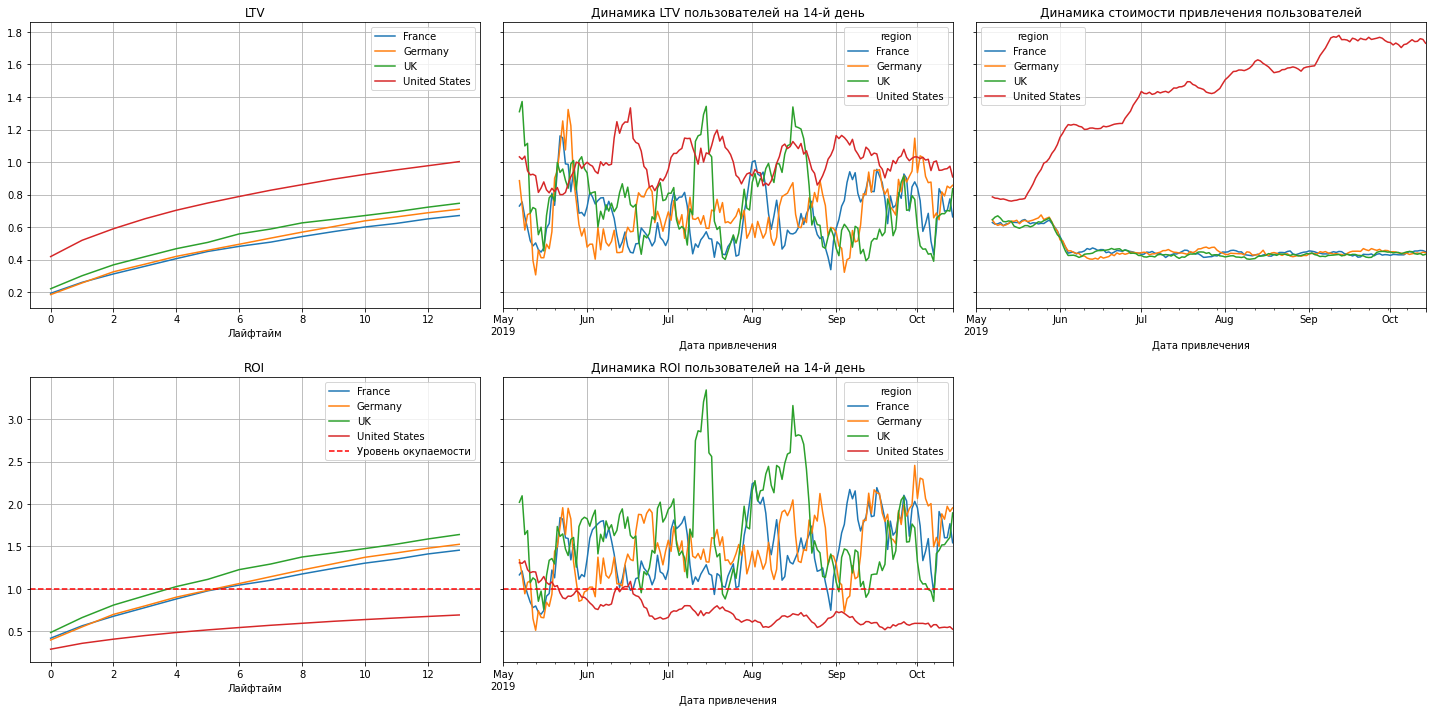

In [102]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

С разбивкой по странам:
- LTV самый высокий в США;
- САС у США имеет самый высокий рост, но не окупается;
- Окупаться перестал в начале июня и уже в июле не окупается.

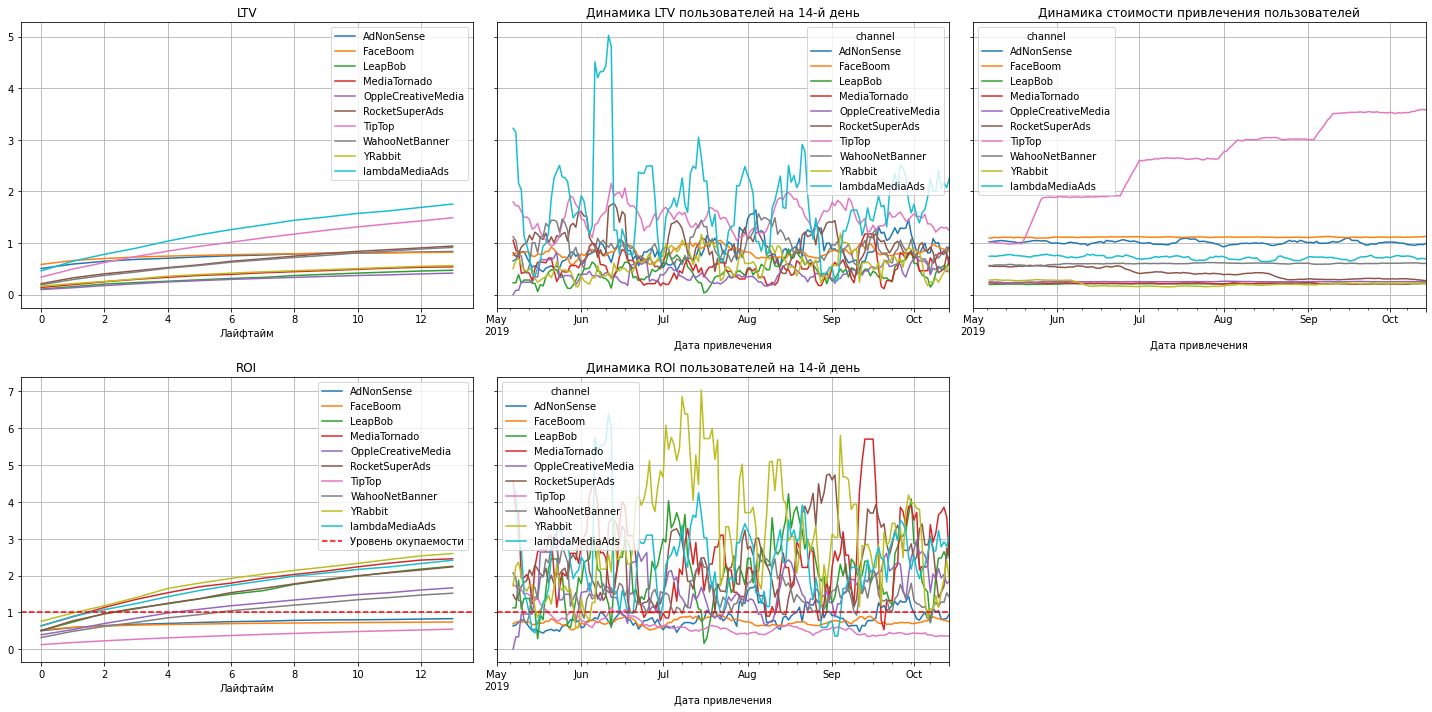

In [103]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По рекламным каналам:
- самая яркая динамика наблюдается у "lambdaMediaAds" и у "TipTop";
- CAC у TipTop имеет самый быстрый рост, при этом окупаемость отсутсвует (как и у FaceBoom, AdNonSense)

In [104]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

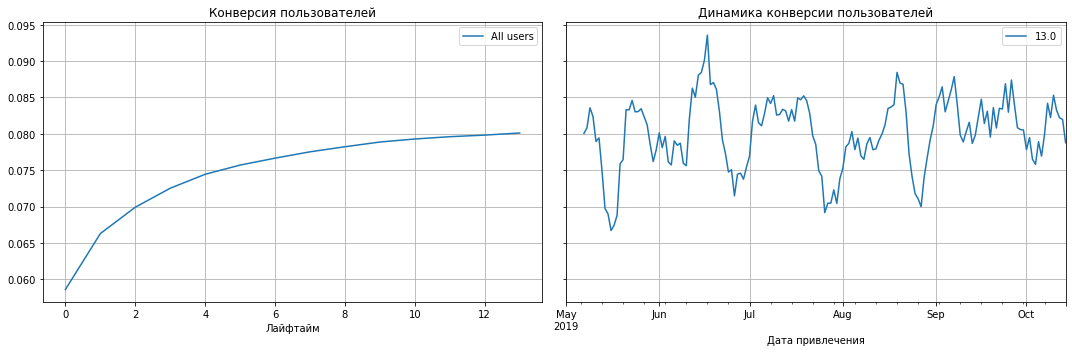

In [105]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей в целом стабильна

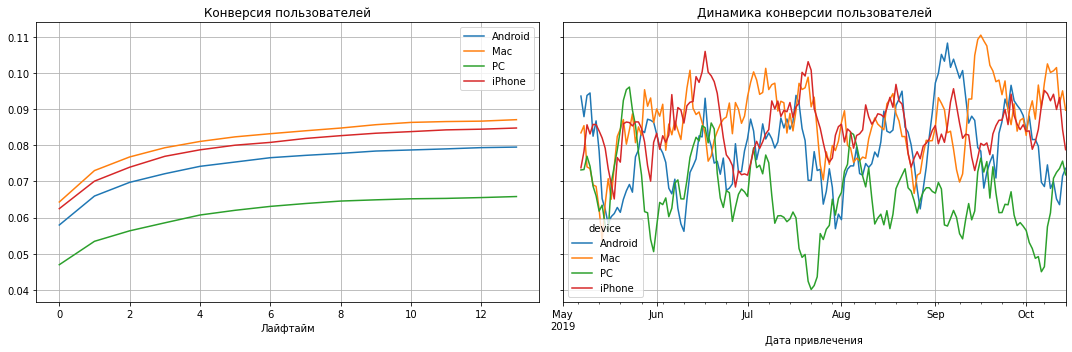

In [106]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По устройствам:
- Конверсия у РС самая низкая;
- Наибольшая наблюдается у Мас.

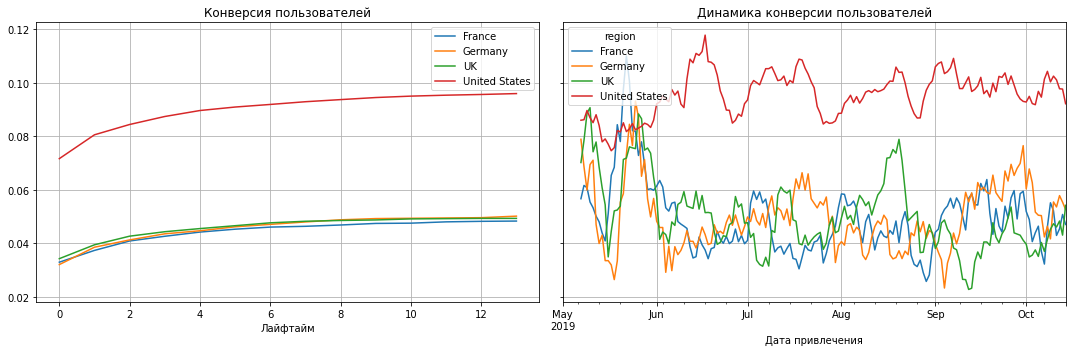

In [107]:
dimensions = ['region']
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По странам:
- конверсия у пользователей с США наибольшая.

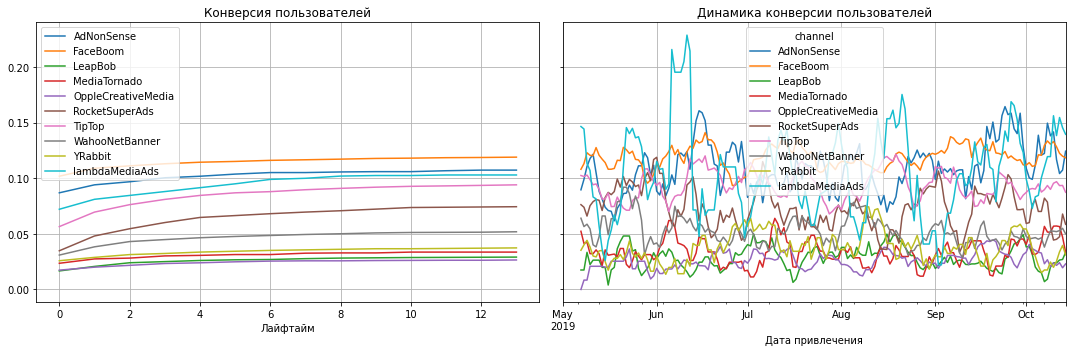

In [108]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По каналам:
- Наибольшая конверсия у FaceBoom.

In [109]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

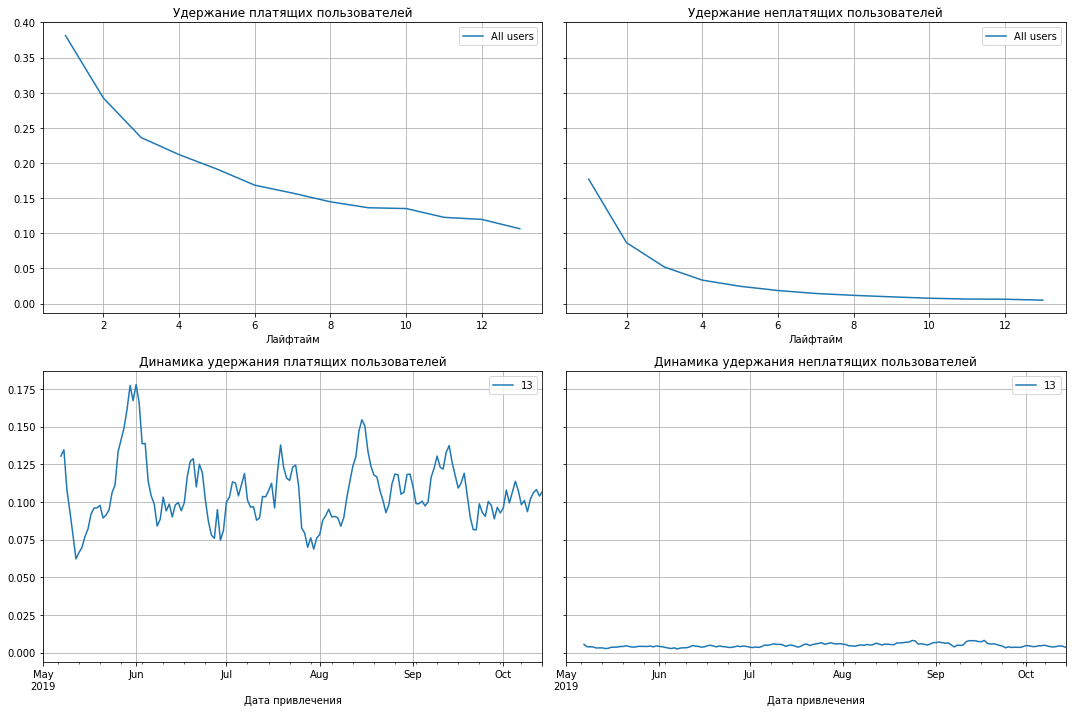

In [110]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- Удержание платящих пользователей в целом снижается;
- Динамика неплатящих пользователей практически остается неизменной.

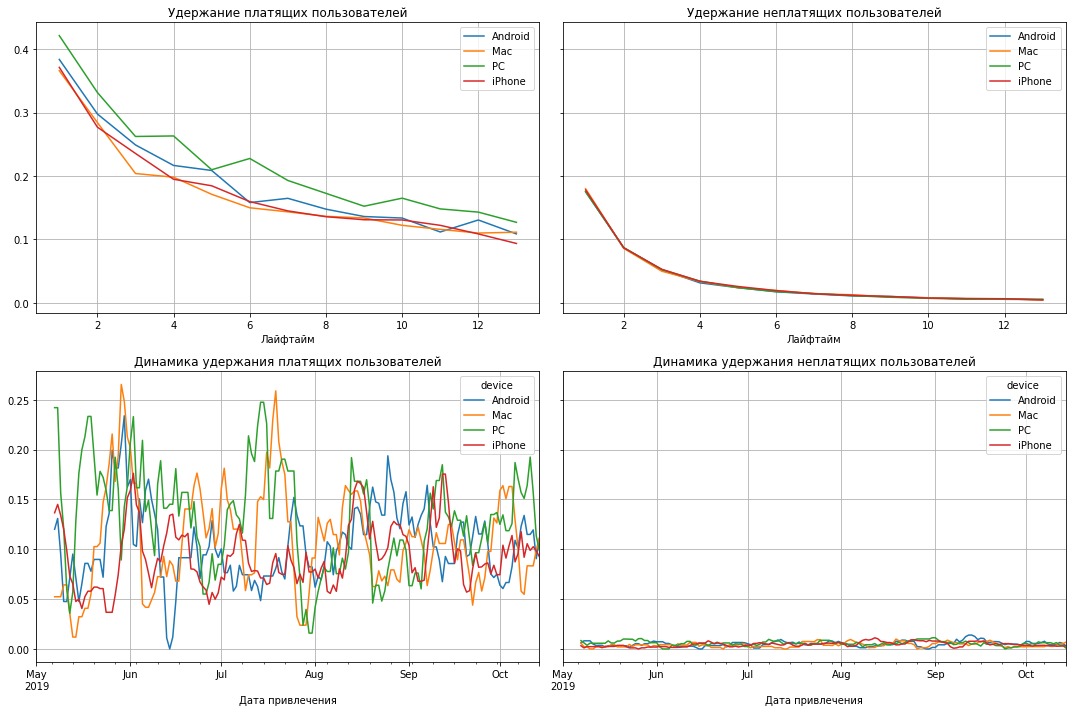

In [111]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По устройствам: примерно все одинаково с общим удержанием.
- У РС самое высокое удержание пользователей.

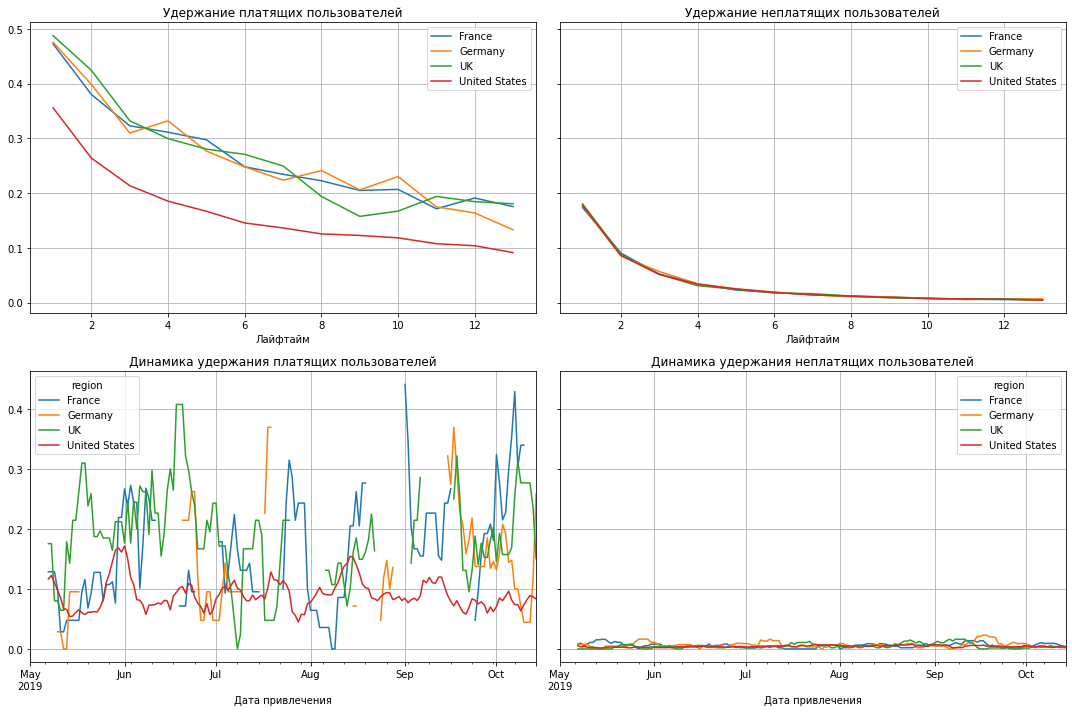

In [112]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По странам:
- США наименьшее удержание платящих пользователей

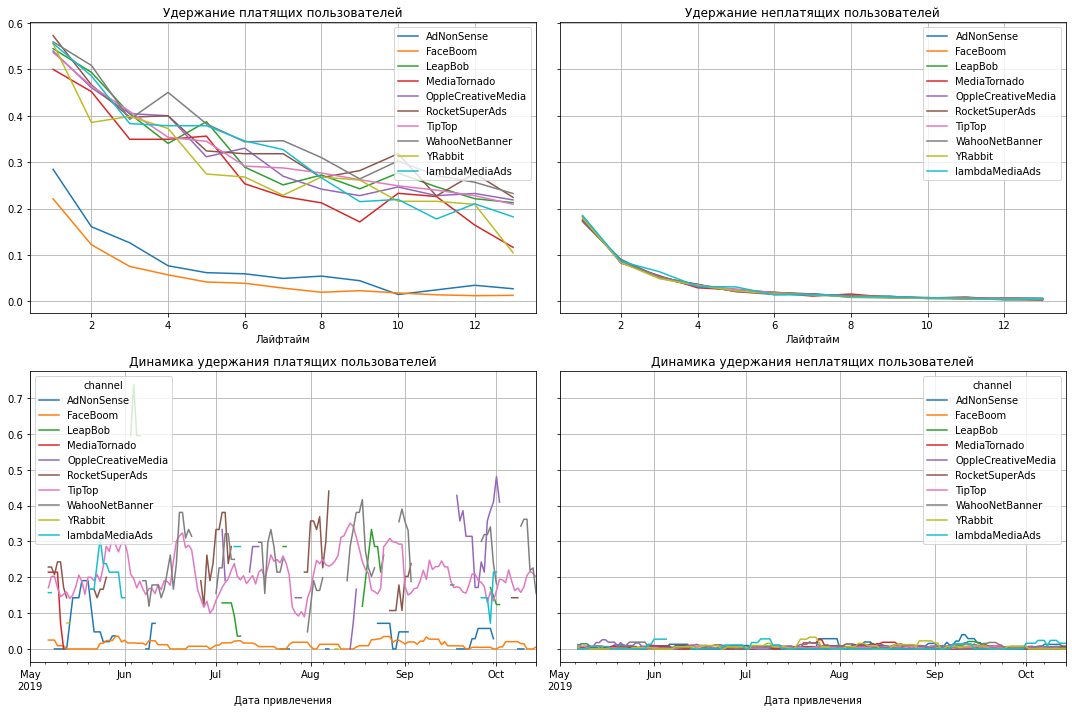

In [113]:
# смотрим удержание с разбивкой по странам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По каналам:
- FaceBoom и AdNonSense имеют наихудший показатель удержания платящих пользователей

Ответьте на такие вопросы:  
1. Окупается ли реклама, направленная на привлечение пользователей в целом?  
- **Реклама не окупается.**
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?  
- **Из устройств не окупаются все устройства кроме РС, по странам это США, по каналам окупаемость отсутсвует у TipTop, как и у FaceBoom, AdNonSense.**
3. Чем могут быть вызваны проблемы окупаемости?  
- **Игнорирование иных каналов.**
4. Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.  
- **Стоит прекратить расходовать средства на TipTop и AdNonSense (у FaceBoom все еще самая высокая конверсия), а также обратить внимание на пользователей с РС, т.к у них самый высокий показатель удержания.**

### Вывод

**Выделите причины неэффективности привлечения пользователей.**  

Существуют три канала инвестиций – AdNonSense, FaceBoom и TipTop – которые пока не показали окупаемость. Главными пользователями из этих каналов являются жители США. Важно отметить, что уровень удержания платящих пользователей из США оказался наименьшим. Динамика ROI по странам демонстрирует, что с течением времени окупаемость платящих пользователей из США ухудшается, в то время как затраты на их привлечение постоянно увеличиваются.

Рекламная система TipTop оказалась неэффективной. Стоимость привлечения пользователей из этого канала возросла, возможно, из-за того, что он не принес ожидаемых результатов. Возможно, жители США в меньшей степени используют эту социальную сеть и подключены через VPN. Наблюдается непропорциональное увеличение CAC (стоимости привлечения клиента) в канале TipTop, что может говорить о неэффективных маркетинговых стратегиях.

Касательно канала FaceBoom, стоит отметить, что он показал высокий уровень конверсии пользователей, однако удержание платящих клиентов оказалось затруднительным. Это может указывать на то, что хотя этот канал эффективно привлекал пользователей, качество платного контента не соответствовало ожиданиям, что может потребовать коррекции маркетинговой стратегии.  

**Сформулируйте рекомендации для отдела маркетинга.**   
- Работать над эффективностью канала lambdaMediaAds, искать более бюджетные способы привлечения пользователей и повышения ROI.
- Активно искать новые каналы привлечения, особенно среди недооцененных каналов с высоким ROI.
- Оптимизировать рекламные кампании для увеличения конверсии у каналов с хорошим удержанием, но низкой конверсией.
- Сосредоточиться на привлечении пользователей на ПК и Android-устройствах.